In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

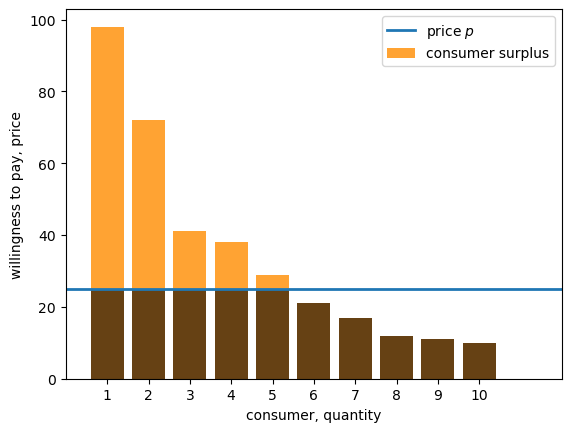

In [2]:
fig, ax = plt.subplots()
consumers = range(1, 11) # consumers 1,..., 10
# willingness to pay for each consumer
wtp = (98, 72, 41, 38, 29, 21, 17, 12, 11, 10)
price = 25
ax.bar(consumers, wtp, label="consumer surplus", color="darkorange", alpha=0.8)
ax.plot((0, 12), (price, price), lw=2, label="price $p$")
ax.bar(consumers, [min(w, price) for w in wtp], color="black", alpha=0.6)
ax.set_xlim(0, 12)
ax.set_xticks(consumers)
ax.set_ylabel("willingness to pay, price")
ax.set_xlabel("consumer, quantity")
ax.legend()
plt.show()

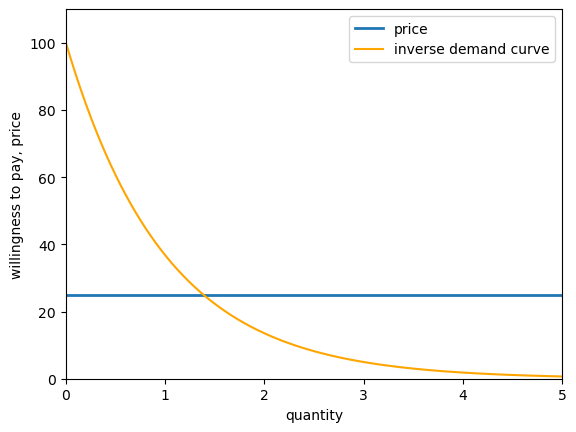

In [3]:
def inverse_demand(q):
    return 100 * np.exp(- q)

# build a grid to evaluate the function at different values of q
q_min, q_max = 0, 5
q_grid = np.linspace(q_min, q_max, 1000)

# plot the inverse demand curve
fig, ax = plt.subplots()
ax.plot((q_min, q_max), (price, price), lw=2, label="price")
ax.plot(q_grid, inverse_demand(q_grid), 
        color="orange", label="inverse demand curve")
ax.set_ylabel("willingness to pay, price")
ax.set_xlabel("quantity")
ax.set_xlim(q_min, q_max)
ax.set_ylim(0, 110)
ax.legend()
plt.show()

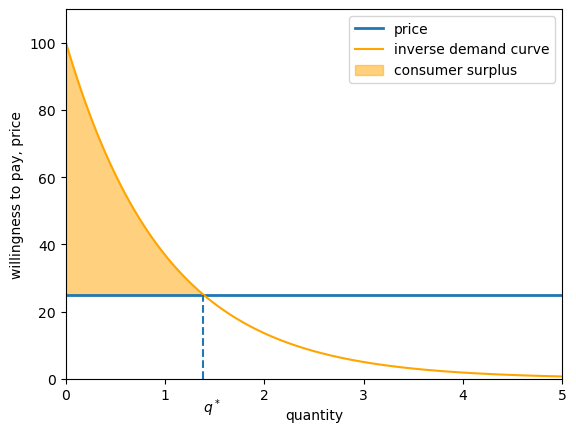

In [4]:
# solve for the value of q where demand meets price
q_star = np.log(100) - np.log(price)

fig, ax = plt.subplots()
ax.plot((q_min, q_max), (price, price), lw=2, label="price")
ax.plot(q_grid, inverse_demand(q_grid), 
        color="orange", label="inverse demand curve")
small_grid = np.linspace(0, q_star, 500)
ax.fill_between(small_grid, np.full(len(small_grid), price),
                inverse_demand(small_grid), color="orange",
                alpha=0.5, label="consumer surplus")
ax.vlines(q_star, 0, price, ls="--")
ax.set_ylabel("willingness to pay, price")
ax.set_xlabel("quantity")
ax.set_xlim(q_min, q_max)
ax.set_ylim(0, 110)
ax.text(q_star, -10, "$q^*$")
ax.legend()
plt.show()

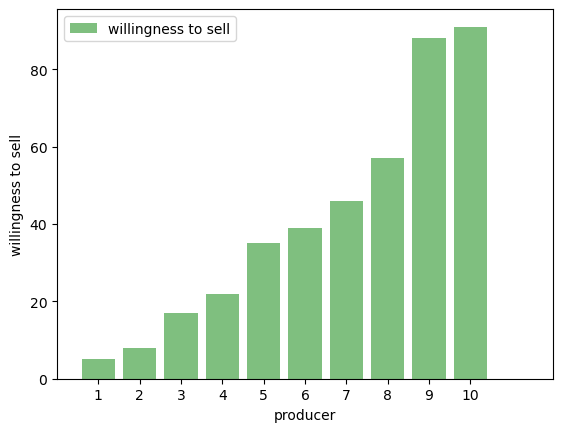

In [5]:
fig, ax = plt.subplots()
producers = range(1, 11) # producers 1,..., 10
# willingness to sell for each producer
wts = (5, 8, 17, 22, 35, 39, 46, 57, 88, 91)
price = 25
ax.bar(producers, wts, label="willingness to sell", color="green", alpha=0.5)
ax.set_xlim(0, 12)
ax.set_xticks(producers)
ax.set_ylabel("willingness to sell")
ax.set_xlabel("producer")
ax.legend()
plt.show()

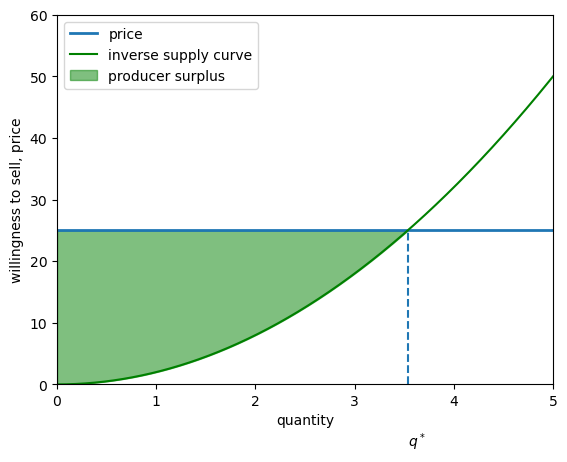

In [6]:
def inverse_supply(q):
    return 2 * q**2

# solve for the value of q where supply meets price
q_star = (price / 2)**(1/2)

# plot the inverse supply curve
fig, ax = plt.subplots()
ax.plot((q_min, q_max), (price, price), lw=2, label="price")
ax.plot(q_grid, inverse_supply(q_grid), 
        color="green", label="inverse supply curve")
small_grid = np.linspace(0, q_star, 500)
ax.fill_between(small_grid, inverse_supply(small_grid), 
                np.full(len(small_grid), price), 
                color="green",
                alpha=0.5, label="producer surplus")
ax.vlines(q_star, 0, price, ls="--")
ax.set_ylabel("willingness to sell, price")
ax.set_xlabel("quantity")
ax.set_xlim(q_min, q_max)
ax.set_ylim(0, 60)
ax.text(q_star, -10, "$q^*$")
ax.legend()
plt.show()

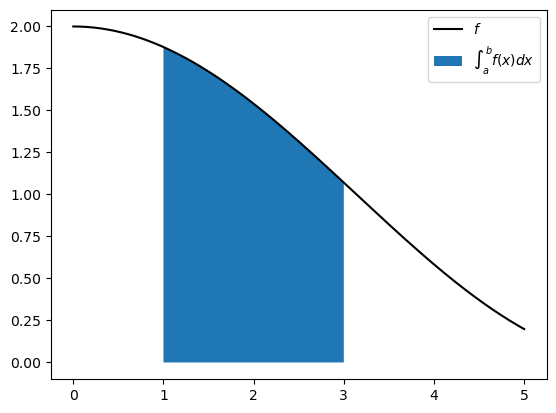

In [7]:
def f(x):
    return np.cos(x/2) + 1

xmin, xmax = 0, 5
a, b = 1, 3
x_grid = np.linspace(xmin, xmax, 1000)
ab_grid = np.linspace(a, b, 400)

fig, ax = plt.subplots()
ax.plot(x_grid, f(x_grid), label="$f$", color="k")
ax.fill_between(ab_grid, [0] * len(ab_grid), f(ab_grid), 
                label="$\int_a^b f(x) dx$")
ax.legend()
plt.show()

In [8]:
Market = namedtuple('Market', ['d_0', # demand intercept
                               'd_1', # demand slope
                               's_0', # supply intercept
                               's_1'] # supply slope
                   )

In [9]:
def create_market(d_0=1.0, d_1=0.6, s_0=0.1, s_1=0.4):
    return Market(d_0=d_0, d_1=d_1, s_0=s_0, s_1=s_1)

In [10]:
def inverse_demand(q, model):
    return model.d_0 - model.d_1 * q

def inverse_supply(q, model):
    return model.s_0 + model.s_1 * q

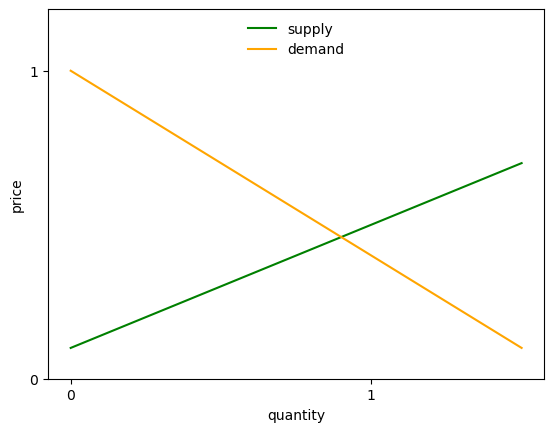

In [11]:
market = create_market()

grid_min, grid_max, grid_size = 0, 1.5, 200
q_grid = np.linspace(grid_min, grid_max, grid_size)
supply_curve = inverse_supply(q_grid, market)
demand_curve = inverse_demand(q_grid, market)

fig, ax = plt.subplots()
ax.plot(q_grid, supply_curve, label='supply', color='green')
ax.plot(q_grid, demand_curve, label='demand', color='orange')
ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((0, 1))
ax.set_yticks((0, 1))
ax.set_xlabel('quantity')
ax.set_ylabel('price')
plt.show()

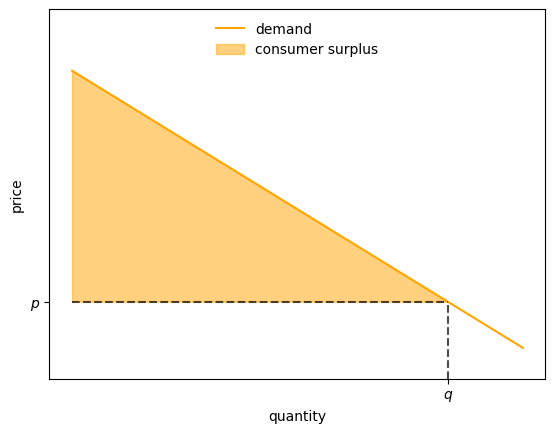

In [12]:
q = 1.25
p = inverse_demand(q, market)
ps = np.ones_like(q_grid) * p

fig, ax = plt.subplots()
ax.plot(q_grid, demand_curve, label='demand', color='orange')
ax.fill_between(q_grid[q_grid <= q],
                demand_curve[q_grid <= q],
                ps[q_grid <= q],
                label='consumer surplus',
                color="orange", 
                alpha=0.5)
ax.vlines(q, 0, p, linestyle="dashed", color='black', alpha=0.7)
ax.hlines(p, 0, q, linestyle="dashed", color='black', alpha=0.7)

ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((q,))
ax.set_xticklabels(("$q$",))
ax.set_yticks((p,))
ax.set_yticklabels(("$p$",))
ax.set_xlabel('quantity')
ax.set_ylabel('price')
plt.show()

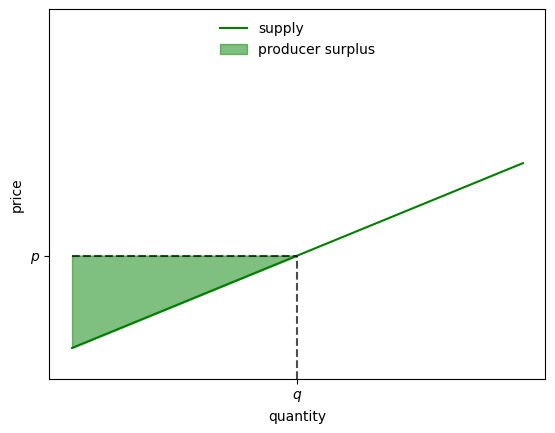

In [13]:
q = 0.75
p = inverse_supply(q, market)
ps = np.ones_like(q_grid) * p

fig, ax = plt.subplots()
ax.plot(q_grid, supply_curve, label='supply', color='green')
ax.fill_between(q_grid[q_grid <= q],
                supply_curve[q_grid <= q],
                ps[q_grid <= q],
                label='producer surplus',
                color="green",
                alpha=0.5)
ax.vlines(q, 0, p, linestyle="dashed", color='black', alpha=0.7)
ax.hlines(p, 0, q, linestyle="dashed", color='black', alpha=0.7)

ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((q,))
ax.set_xticklabels(("$q$",))
ax.set_yticks((p,))
ax.set_yticklabels(("$p$",))
ax.set_xlabel('quantity')
ax.set_ylabel('price')
plt.show()

In [14]:
def W(q, market):
    # Compute and return welfare
    return (market.d_0 - market.s_0) * q - 0.5 * (market.d_1 + market.s_1) * q**2

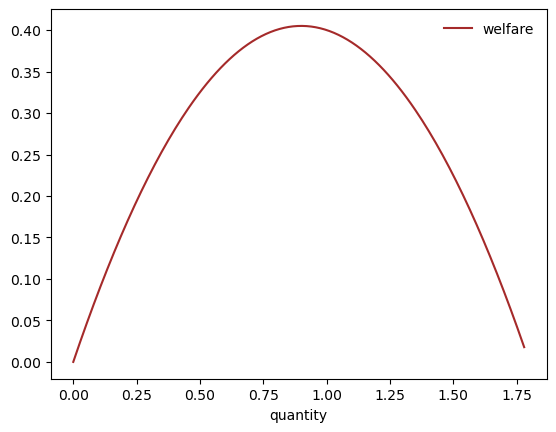

In [15]:
q_vals = np.linspace(0, 1.78, 200)
fig, ax = plt.subplots()
ax.plot(q_vals, W(q_vals, market), label='welfare', color='brown')
ax.legend(frameon=False)
ax.set_xlabel('quantity')
plt.show()

In [16]:
def inverse_demand(q, model):
    return model.d_0 - model.d_1 * q**0.6

def inverse_supply(q, model):
    return model.s_0 + model.s_1 * q**1.8

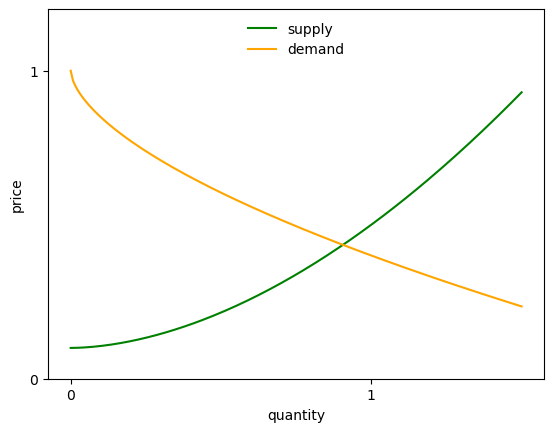

In [17]:
grid_min, grid_max, grid_size = 0, 1.5, 200
q_grid = np.linspace(grid_min, grid_max, grid_size)
market = create_market()
supply_curve = inverse_supply(q_grid, market)
demand_curve = inverse_demand(q_grid, market)

fig, ax = plt.subplots()
ax.plot(q_grid, supply_curve, label='supply', color='green')
ax.plot(q_grid, demand_curve, label='demand', color='orange')
ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((0, 1))
ax.set_yticks((0, 1))
ax.set_xlabel('quantity')
ax.set_ylabel('price')
plt.show()

In [18]:
def W(q, market):
    # Compute and return welfare
    S_c = market.d_0 * q - market.d_1 * q**1.6 / 1.6
    S_p = market.s_0 * q + market.s_1 * q**2.8 / 2.8
    return S_c - S_p

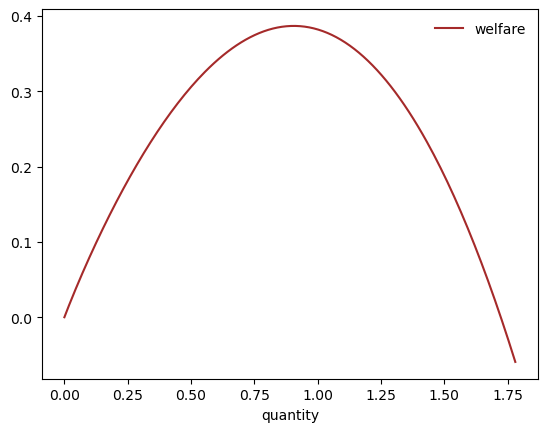

In [19]:
fig, ax = plt.subplots()
ax.plot(q_vals, W(q_vals, market), label='welfare', color='brown')
ax.legend(frameon=False)
ax.set_xlabel('quantity')
plt.show()

In [20]:
from scipy.optimize import minimize_scalar

def objective(q):
    return -W(q, market)

result = minimize_scalar(objective, bounds=(0, 10))
print(result.message)

Solution found.


In [21]:
maximizing_q = result.x
print(f"{maximizing_q: .5f}")

 0.90564


In [22]:
from scipy.optimize import newton

def excess_demand(q):
    return inverse_demand(q, market) - inverse_supply(q, market)

equilibrium_q = newton(excess_demand, 0.99)
print(f"{equilibrium_q: .5f}")

 0.90564
